In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generated the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


## Created Plots to Showcase the Relationship Between Weather Variables and Latitude

### Used the OpenWeatherMap API to retrieve weather data from the cities list 

---

In [3]:
#for visualizing json structure for the following cell
url = "https://api.openweathermap.org/data/2.5/weather"

city1 = cities[0]
url1 = f"{url}?q={city1}&appid={weather_api_key}"

response = requests.get(url1)
city_weather = response.json()

print(json.dumps(city_weather,indent=2))

{
  "coord": {
    "lon": 166.4372,
    "lat": 68.0546
  },
  "weather": [
    {
      "id": 500,
      "main": "Rain",
      "description": "light rain",
      "icon": "10d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 284.26,
    "feels_like": 283.85,
    "temp_min": 284.26,
    "temp_max": 284.26,
    "pressure": 1006,
    "humidity": 93,
    "sea_level": 1006,
    "grnd_level": 972
  },
  "visibility": 10000,
  "wind": {
    "speed": 0.82,
    "deg": 256,
    "gust": 0.92
  },
  "rain": {
    "1h": 0.23
  },
  "clouds": {
    "all": 100
  },
  "dt": 1690314168,
  "sys": {
    "country": "RU",
    "sunrise": 1690295393,
    "sunset": 1690371082
  },
  "timezone": 43200,
  "id": 2126682,
  "name": "Bilibino",
  "cod": 200
}


In [4]:
# Set the API base URL
#url = "https://api.openweathermap.org/data/2.5/weather" already called in the previous cell 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | ghat
Processing Record 4 of Set 1 | pionerskiy
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | caleta olivia
Processing Record 8 of Set 1 | howrah
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | roxas
Processing Record 11 of Set 1 | okhotsk
Processing Record 12 of Set 1 | lebyazh'ye
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | pingliang
Processing Record 15 of Set 1 | kingston
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | ferrandina
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | bad bruckenau
Processing Record 21 of Set 1 | susuman
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 

Processing Record 38 of Set 4 | al burayqah
Processing Record 39 of Set 4 | neiafu
Processing Record 40 of Set 4 | dhuusamarreeb
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | manta
Processing Record 43 of Set 4 | konarka
Processing Record 44 of Set 4 | nemuro
Processing Record 45 of Set 4 | tchintabaraden
Processing Record 46 of Set 4 | fort bragg
Processing Record 47 of Set 4 | vuktyl
Processing Record 48 of Set 4 | vorkuta
Processing Record 49 of Set 4 | raja
Processing Record 0 of Set 5 | acajutla
Processing Record 1 of Set 5 | labytnangi
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | baiti
Processing Record 4 of Set 5 | callao
Processing Record 5 of Set 5 | saipan
Processing Record 6 of Set 5 | dobroye
Processing Record 7 of Set 5 | berezovyy
Processing Record 8 of Set 5 | pogar
Processing Record 9 of Set 5 | tailai
Processing Record 10 of Set 5 | sola
Processing Record 11 of Set 5 | guercif
Processing Record 12 of Set 5 | rhar el m

Processing Record 32 of Set 8 | espargos
City not found. Skipping...
Processing Record 33 of Set 8 | zhanaozen
Processing Record 34 of Set 8 | shingu
Processing Record 35 of Set 8 | viedma
Processing Record 36 of Set 8 | aioun
Processing Record 37 of Set 8 | letterkenny
Processing Record 38 of Set 8 | mejit
Processing Record 39 of Set 8 | holmsund
Processing Record 40 of Set 8 | atlantis
Processing Record 41 of Set 8 | itoman
Processing Record 42 of Set 8 | jayapura
Processing Record 43 of Set 8 | camp swift
Processing Record 44 of Set 8 | bloomington
Processing Record 45 of Set 8 | tofol
Processing Record 46 of Set 8 | huangmei
Processing Record 47 of Set 8 | okha
Processing Record 48 of Set 8 | brandon
Processing Record 49 of Set 8 | santana
Processing Record 0 of Set 9 | grantsville
Processing Record 1 of Set 9 | hammerfest
Processing Record 2 of Set 9 | medina
Processing Record 3 of Set 9 | alice springs
Processing Record 4 of Set 9 | lospalos
Processing Record 5 of Set 9 | olyokmi

Processing Record 22 of Set 12 | ushirombo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#coverted kelvin temperature values to celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,11.11,93,100,0.82,RU,1690314168
1,tiksi,71.6872,128.8694,4.98,76,38,1.70,RU,1690314169
2,ghat,24.9647,10.1728,35.57,11,92,3.59,LY,1690314169
3,pionerskiy,54.9508,20.2275,16.91,75,100,6.80,RU,1690314169
4,albany,42.6001,-73.9662,27.23,70,100,1.46,US,1690314169


In [18]:
# Export the City_Data into a csv
if not os.path.exists('output_data'):
    os.makedirs('output_data')
    
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,11.11,93,100,0.82,RU,1690314168
1,tiksi,71.6872,128.8694,4.98,76,38,1.70,RU,1690314169
2,ghat,24.9647,10.1728,35.57,11,92,3.59,LY,1690314169
3,pionerskiy,54.9508,20.2275,16.91,75,100,6.80,RU,1690314169
4,albany,42.6001,-73.9662,27.23,70,100,1.46,US,1690314169


### Created the Scatter Plots Requested

#### Latitude Vs. Temperature

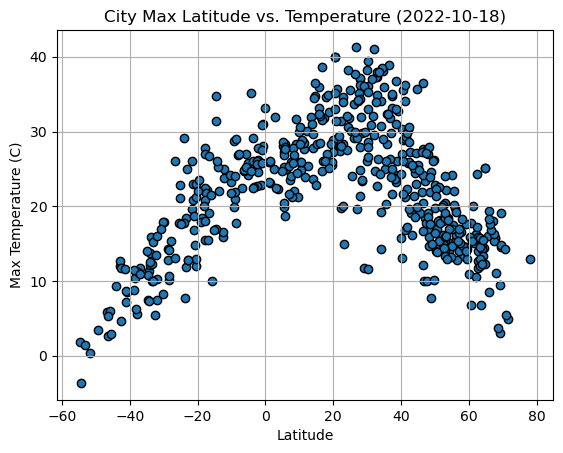

In [20]:
# Build scatter plot for latitude vs. temperature
x_latitude = city_data_df["Lat"]
y_temperature = city_data_df["Max Temp"]
plt.scatter(x_latitude, y_temperature, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

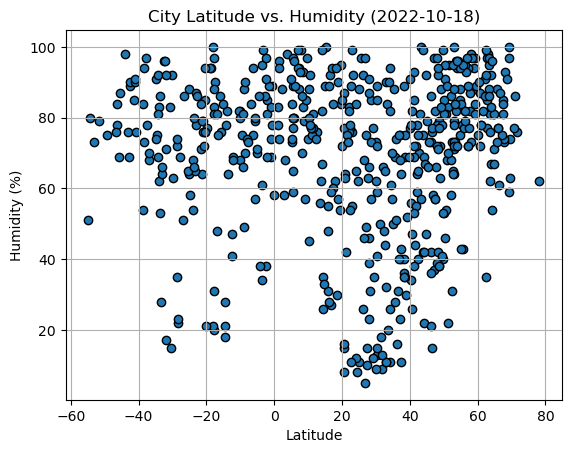

In [21]:
# Build the scatter plots for latitude vs. humidity
y_humidity = city_data_df["Humidity"]
plt.scatter(x_latitude, y_humidity, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

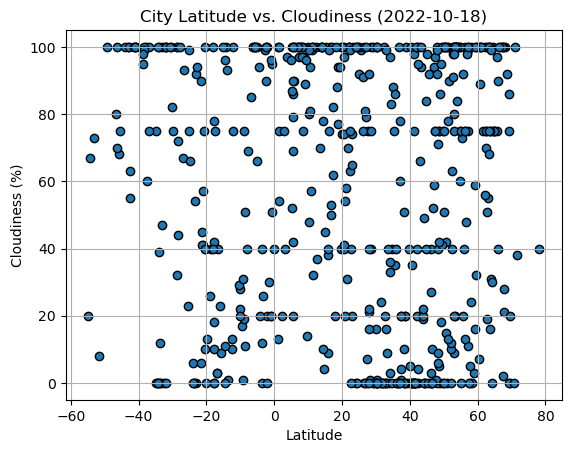

In [24]:
# Build the scatter plots for latitude vs. cloudiness
y_cloudiness = city_data_df["Cloudiness"]
plt.scatter(x_latitude, y_cloudiness, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

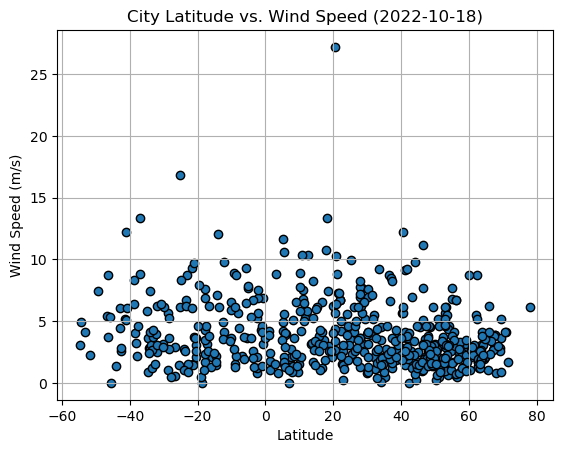

In [25]:
# Build the scatter plots for latitude vs. wind speed 
y_wind_speed = city_data_df["Wind Speed"]
plt.scatter(x_latitude, y_wind_speed, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Computed Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,11.11,93,100,0.82,RU,1690314168
1,tiksi,71.6872,128.8694,4.98,76,38,1.70,RU,1690314169
2,ghat,24.9647,10.1728,35.57,11,92,3.59,LY,1690314169
3,pionerskiy,54.9508,20.2275,16.91,75,100,6.80,RU,1690314169
4,albany,42.6001,-73.9662,27.23,70,100,1.46,US,1690314169


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,caleta olivia,-46.4393,-67.5281,2.69,78,100,8.77,AR,1690314170
17,grytviken,-54.2811,-36.5092,-3.64,80,67,4.93,GS,1690314172
21,puerto ayora,-0.7393,-90.3518,30.98,89,51,3.13,EC,1690314054
25,mount gambier,-37.8333,140.7667,5.64,97,100,2.22,AU,1690313656
29,ushuaia,-54.8000,-68.3000,1.81,51,20,3.09,AR,1690313899


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4034187648835627


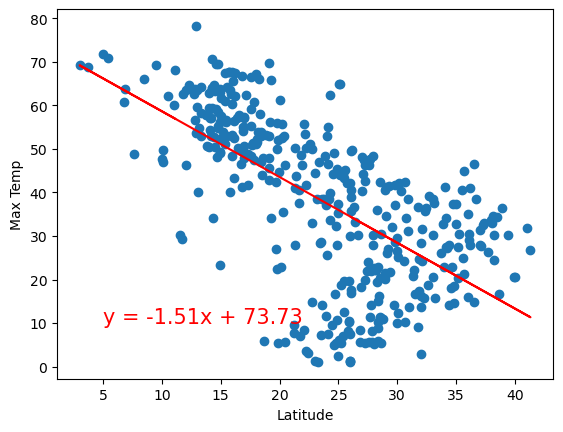

In [38]:
# Linear regression on Northern Hemisphere
x_northern_temperature = northern_hemi_df["Max Temp"]
y_northern_latitude = northern_hemi_df["Lat"]
title = 'Max Temp'
linear_reg_plot(x_northern_temperature, y_northern_latitude, title, (5,10))

The r-value is: 0.7459610907267097


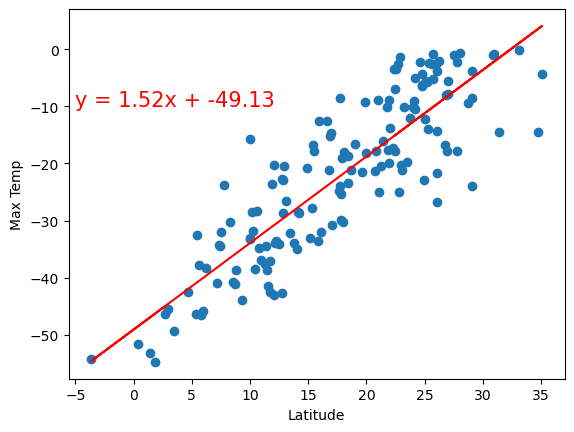

In [39]:
# Linear regression on Southern Hemisphere
x_southern_temperature = southern_hemi_df["Max Temp"]
y_southern_latitude = southern_hemi_df["Lat"]
title = 'Max Temp'
linear_reg_plot(x_southern_temperature, y_southern_latitude, title, (-5,-10))

**Linear Relationship Results:** The temperature vs latitude linear relationship for the Northern Hemisphere is weak and positive. As latitude increases, the temperature tends to increase, but the relationship is not highly predictable. Where as for the Southern Hemisphere, the temperature and latitude have a moderate positive linear relationship. It indicates a stronger correlation between temperature and latitude in the Southern Hemisphere compared to the Northern Hemisphere. As latitude increases in the Southern Hemisphere, the temperature tends to increase, and the relationship is more predictable than in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01539744755255289


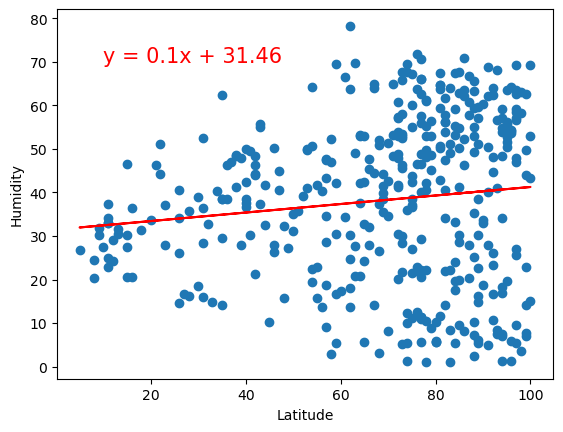

In [41]:
# Northern Hemisphere
x_northern_humidity = northern_hemi_df["Humidity"]
y_northern_latitude = northern_hemi_df["Lat"]
title = 'Humidity'
linear_reg_plot(x_northern_humidity, y_northern_latitude, title, (10,70))

The r-value is: 0.0018199531559860813


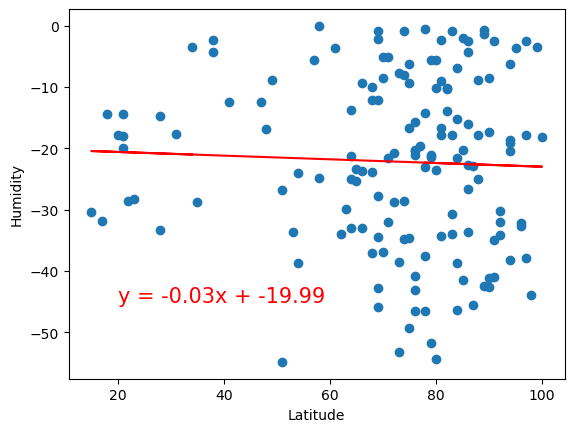

In [43]:
# Southern Hemisphere
x_southern_humidity = southern_hemi_df["Humidity"]
y_southern_latitude = southern_hemi_df["Lat"]
title = 'Humidity'
linear_reg_plot(x_southern_humidity, y_southern_latitude, title, (20,-45))

**Linear Relationship Results:** In both cases, the r-values are very small, which suggests that latitude is not a strong predictor of humidity levels in either the Northern or Southern Hemisphere. Other factors, such as proximity to bodies of water, prevailing wind patterns, and local geography, may play more significant roles in determining humidity levels in different regions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008996850233721166


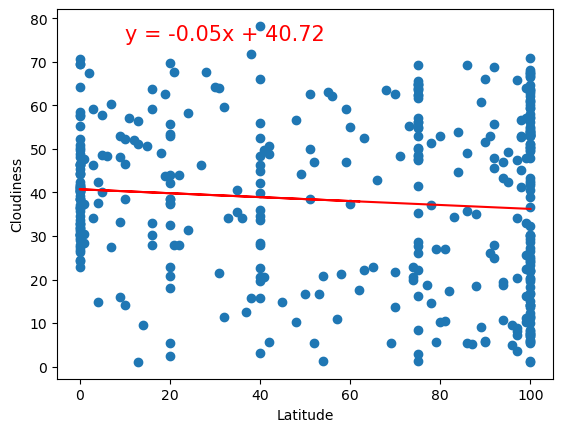

In [45]:
# Northern Hemisphere
x_northern_cloudiness = northern_hemi_df["Cloudiness"]
y_northern_latitude = northern_hemi_df["Lat"]
title = 'Cloudiness'
linear_reg_plot(x_northern_cloudiness, y_northern_latitude, title, (10,75))

The r-value is: 0.03190276379678874


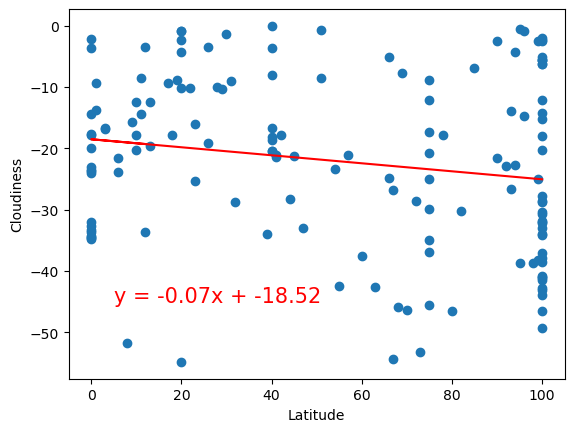

In [48]:
# Southern Hemisphere
x_southern_cloudiness = southern_hemi_df["Cloudiness"]
y_southern_latitude = southern_hemi_df["Lat"]
title = 'Cloudiness'
linear_reg_plot(x_southern_cloudiness, y_southern_latitude, title, (5,-45))

**Linear Relationship Results:** In both hemispheres, the r-values are very close to zero, suggesting that latitude is not a good predictor of cloudiness levels. Other factors, such as prevailing weather systems, proximity to oceans or large bodies of water, and topography, are likely to play more significant roles in determining cloudiness patterns.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008996850233721166


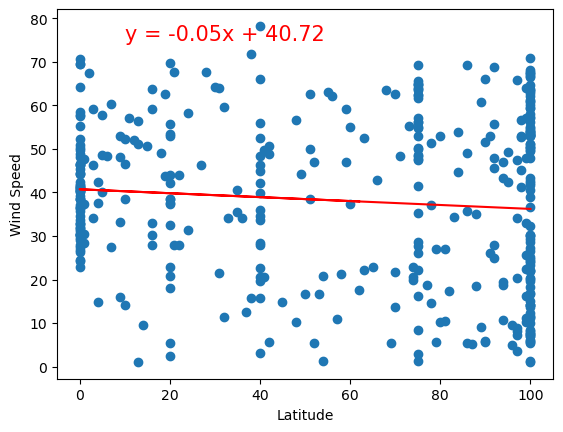

In [49]:
# Northern Hemisphere
x_northern_wind_speed = northern_hemi_df["Wind Speed"]
y_northern_latitude = northern_hemi_df["Lat"]
title = 'Wind Speed'
linear_reg_plot(x_northern_cloudiness, y_northern_latitude, title, (10,75))

The r-value is: 0.0006321150738914827


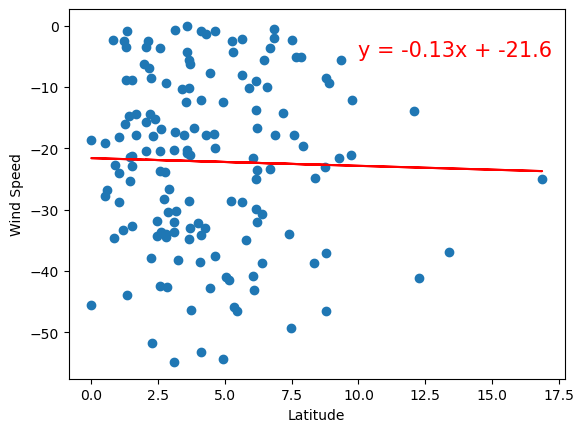

In [53]:
# Southern Hemisphere
x_southern_wind_speed = southern_hemi_df["Wind Speed"]
y_southern_latitude = southern_hemi_df["Lat"]
title = 'Wind Speed'
linear_reg_plot(x_southern_wind_speed, y_southern_latitude, title, (10,-5))

**Linear Relationship Results:** In both hemispheres, the r-values are very small, indicating that latitude is not a strong predictor of wind speed levels. Wind speed is influenced by a wide range of factors, including local weather patterns, topography, proximity to bodies of water, and temperature gradients, among others. Latitude alone does not provide sufficient information to predict wind speed accurately.